# Artificial Intelligence for Robotics 01

## General Information:
Please do not add or delete any cells. Answers belong into the corresponding cells (below the question). If a function is given (either as a signature or a full function), you should not change the name, arguments or return value of the function.

If you encounter empty cells underneath the answer that can not be edited, please ignore them, they are for testing purposes.

When editing an assignment there can be the case that there are variables in the kernel. To make sure your assignment works, please restart the kernel and run all cells before submitting (e.g. via Kernel -> Restart & Run All).

Code cells where you are supposed to give your answer often include the line `raise NotImplementedError`. This makes it easier to automatically grade answers. If you edit the cell please outcomment or delete this line.

## Submission:
Please submit your notebook via the web interface (in the main view -> Assignments -> Submit). The assignments are **due on Monday at 20:00**.

## Group Work:
Please enter your UID (your username here) and those of your group partners into the next cell. We apply plagiarism checking, so do not submit others solutions! If an assignment has a copied solution, the task will be graded with 0 points for all people with the same solution.

## Questions about the Assignment:
If you have questions about the assignment please post them in the LEA forum before the deadline. Don't wait until the last day to post questions!

### Please add the usernames of all your team members in the manner member1, member2 in next cell (example given below)

member1 = 'example'

member2 = 'example2'

#### If you are not working in a group, then please add member2 as none2s

In [5]:
# YOUR CODE HERE
member1 = 'nravi2s'
member2 = 'hmohan2s'
member2 = 'jthyri2s'

In [6]:
# Execute this cell to make sure you correctly filled in the usernames of the team members

def group_name_test():
    for member_id in [member1, member2]:
        assert isinstance(member_id, str), "Please give your member id as a string."
        assert len(member_id) > 0, "You need to fill in the member id for both members"
        assert member_id.endswith("2s"), "The member id should end with 2s (Your JupyterHub username)"

group_name_test() 
print("All tests passed!")

All tests passed!


# Task 1

**[130 Point(s)]**

# Social Robot Navigation and Seating Arrangement

## Background
You are working with a social robot in a home environment that needs to help coordinate a dinner gathering. The robot must help guide guests to their seats at the dining table while respecting social constraints and optimizing its path. The home layout is provided with furniture, walls, and initial positions of people marked.

## Scenario
A dinner party is being hosted where 8 guests (P1-P8) are dispersed throughout the house. The robot needs to:
1. Determine a valid seating arrangement at the dining table based on social constraints
2. Plan paths to guide each guest to their assigned seat

### Note
__You are not limited to using the provided libraries or function skeletons. Feel free to use any other tools or methods that you believe are better suited for implementing this solution. The only requirement is to use the randomly generated house layout provided with the assignment. Your solution must be built using this specific house layout.__


## Task 1.1

**[10 Point(s)]**

### Task1: Read the Home layout (10 points)

The task is to develop a pathfinding solution for a robot operating on a grid. The robot of the **dimension(2x2)** must guide several people of the **dimension(1x1)** to their destinations, minimizing the overall cost. The grid's configuration - **obstacles, location of people, furniture placement** is dynamic and changes per execution but the **number of rooms** remain same. The annotations for identifying obstacles and people remains the same throughtout all runs. This grid layout will be available in a file produced by the given function. 

**You need to implement a function capable of reading and parsing this file.**

For the purpose of visualisation the home layout is also visible as a plot below.


#### Grid Symbol Legend
    - `.` : Empty space/Corridor
    - `W` : Wall
    - `L` : Living Room  
    - `D` : Dining Room
    - `K` : Kitchen
    - `B` : Bedroom
    - `C` : Balcony
    - `d` : Door
    - `r` : Robot
    - `T` : Dining Table
    - `H` : Dining Chair
    - `S` : Sofa
    - `c` : Coffee Table
    - `b` : Bed
    - `A` : Wardrobe
    - `k` : Kitchen Counter
    - `F` : Fridge
    - `G` : Garden Chair
    - `1-N`: Person (where N is the number of people)

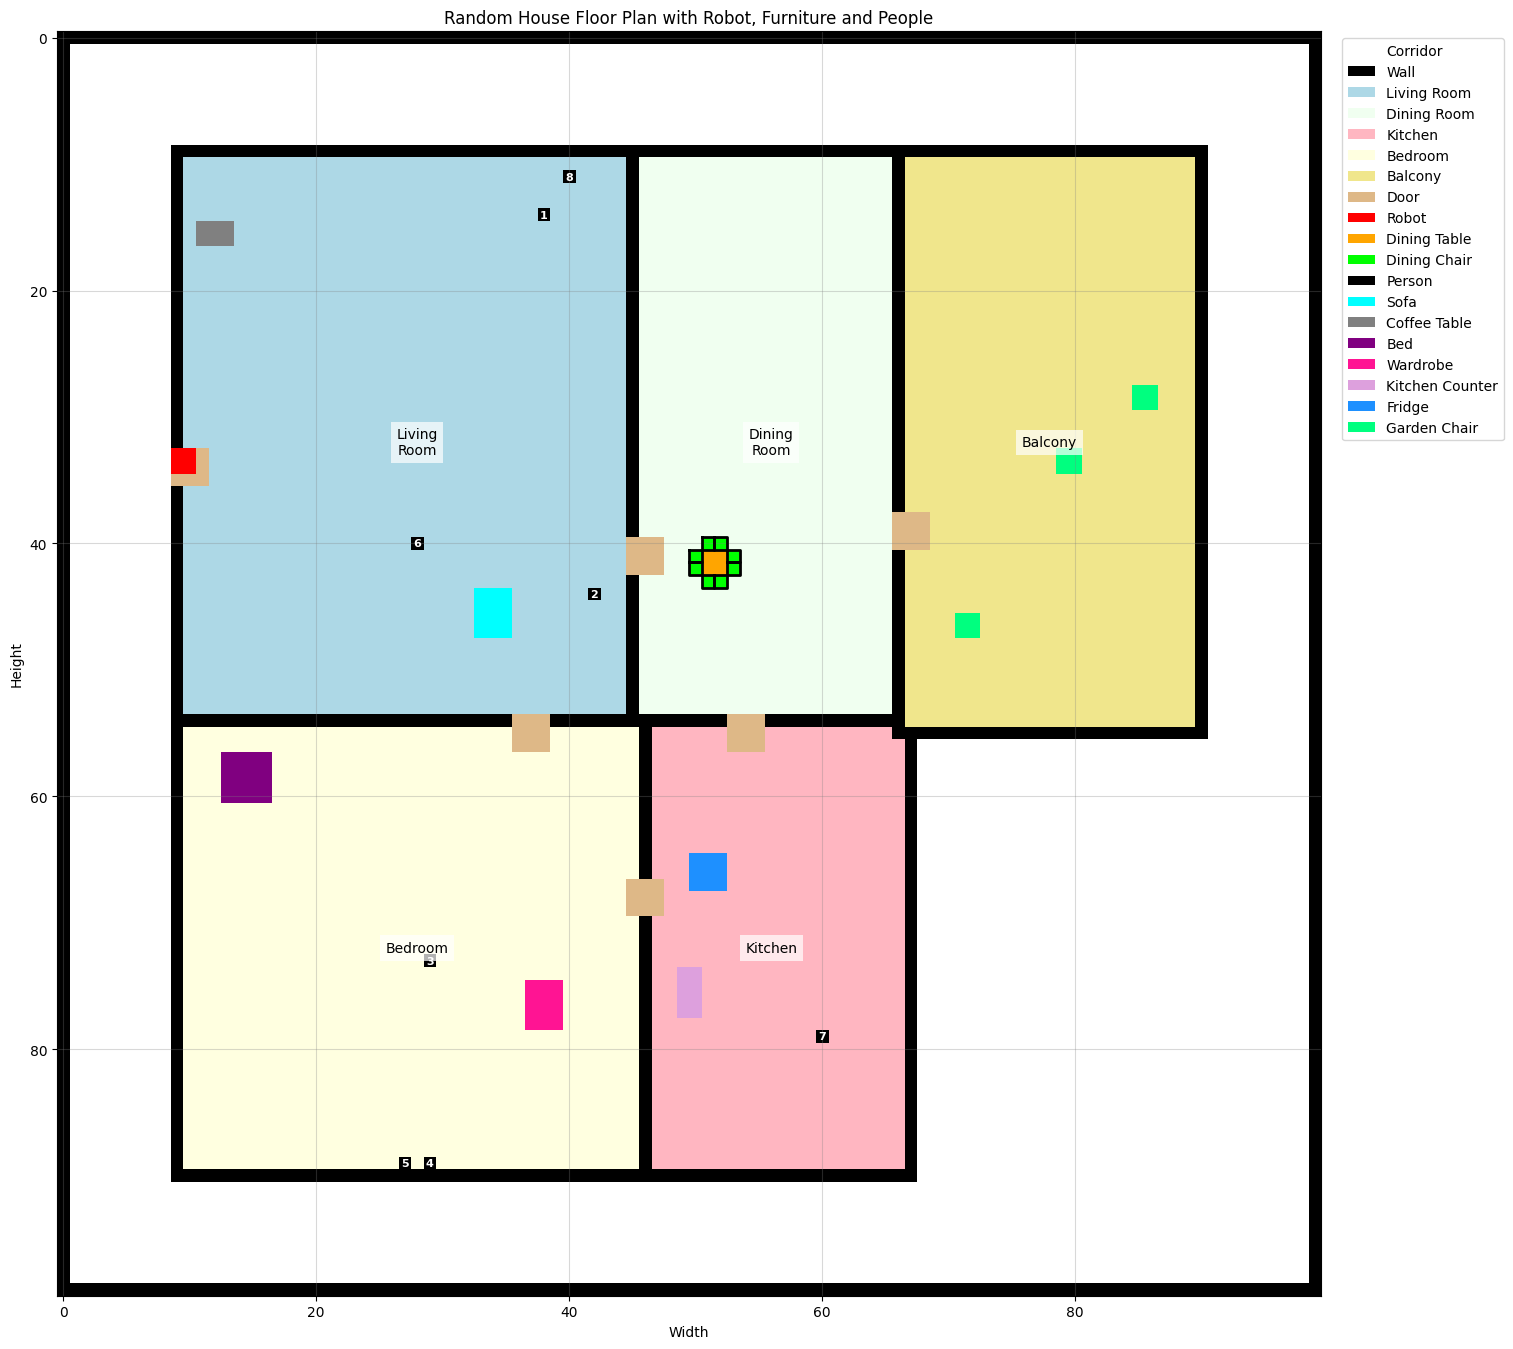

In [19]:
from utils.home_layout import generate_house_layout

grid, rooms = generate_house_layout(file_name = 'home.txt')

In [23]:
# YOUR CODE HERE
import numpy as np
file_path = ...
def read_layout(file_path='home.txt'):
    file_path = file_path
    home = []
    with open(file_path, 'r') as file:

        for line in file:
            row = line.strip().split(' ')
            home.append(row)
    home = np.array(home)
    return home



# usage

file_path = "home.txt"
grid = read_layout(file_path)
print(rooms)

{'L': (slice(10, 55, None), slice(10, 46, None)), 'D': (slice(10, 55, None), slice(46, 67, None)), 'K': (slice(55, 90, None), slice(46, 67, None)), 'B': (slice(55, 90, None), slice(10, 46, None)), 'C': (slice(10, 55, None), slice(67, 90, None))}


## Task 1.2

**[20 Point(s)]**

## Task 2: Topological Mapping (20 points)

The robot needs to navigate through a large house environment to guide people to their seats. Planning paths directly on this grid is inefficient. Your task is to create a topological graph that represents the house layout at a higher level of abstraction, enabling hierarchical path planning.

#### Why does it matter? 
A topological map reduces the problem by first planning through rooms, then detailed paths.This hierarchical approach significantly reduces the search space and planning time.



To do so, you can utilise [networkx](https://networkx.org/) for creating graphs.
Below is an example showing how to create and visualize a graph with networkx. Feel free to implement your own approach - this is just an illustration and not meant to dictate your solution.


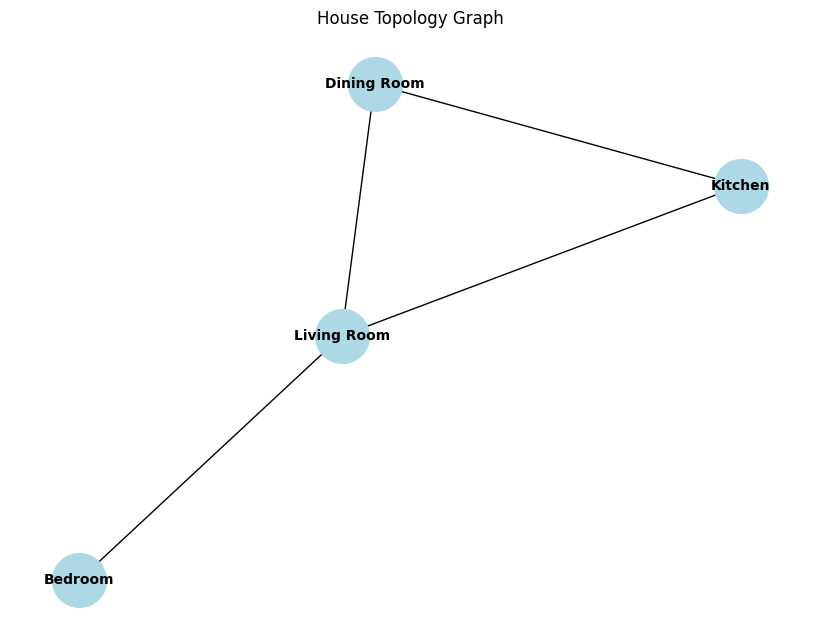

In [15]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


# Create a new graph
G = nx.Graph()

# Add nodes (rooms)
G.add_node("Living Room")
G.add_node("Kitchen") 
G.add_node("Bedroom")
G.add_node("Dining Room")

# Add edges (doors/connections between rooms)
G.add_edge("Living Room", "Kitchen")
G.add_edge("Living Room", "Dining Room")
G.add_edge("Kitchen", "Dining Room") 
G.add_edge("Living Room", "Bedroom")

# Draw the graph
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1500, font_size=10, font_weight='bold')
plt.title("House Topology Graph")
plt.show()


In [16]:
import networkx as nx
import matplotlib.pyplot as plt

ROOM_SYMBOLS = {
    'Living Room': {'L', 'S', 'c'},
    'Dining Room': {'D', 'T', 'H'},
    'Kitchen': {'K', 'k', 'F'},
    'Bedroom': {'B', 'b', 'A'},
    'Balcony': {'C', 'G'},
}

symbol_to_room = {}
for room, symbols in ROOM_SYMBOLS.items():
    for s in symbols:
        symbol_to_room[s] = room

def build_topological_graph(grid):
    G = nx.Graph()
    rows, cols = len(grid), len(grid[0])

    for y in range(rows):
        for x in range(cols):
            sym = grid[y][x]
            if sym not in symbol_to_room:
                continue

            current_room = symbol_to_room[sym]

            for dy, dx in [(-1,0), (1,0), (0,-1), (0,1)]:
                ny, nx_ = y + dy, x + dx
                if 0 <= ny < rows and 0 <= nx_ < cols:
                    neighbor_sym = grid[ny][nx_]
                    if neighbor_sym not in symbol_to_room:
                        continue

                    neighbor_room = symbol_to_room[neighbor_sym]
                    if neighbor_room != current_room:
                        G.add_edge(current_room, neighbor_room)

    return G


def plot_topological_graph(G):
    if G.number_of_nodes() == 0:
        print("No rooms found to display.")
        return

    plt.figure(figsize=(10, 7))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightcoral',
            node_size=2000, font_size=10, font_weight='bold')
    plt.title("Room-Only Topological Graph")
    plt.show()


    
    
grid = read_layout(file_path)  # from Task 1
topo_graph = build_topological_graph(grid)
plot_topological_graph(topo_graph)


No rooms found to display.


## Task 1.3

**[30 Point(s)]**

## Task 3: Path Planning (30 points)

The robot needs to guide multiple people to their assigned seats at the dining table. For each person, the robot must:

1. Plan a path from the robot's current position to the person
2. Plan a path from the person to their assigned seat
3. Implement A* search algorithm for path planning
4. Handle obstacles (furniture, walls) and other people as blocked cells

To do so, you need to **implement A\* search with appropriate heuristic function**, make sure to account for walls, furniture and other people as obstacles.

**Calculate and print total path cost for the complete guidance task**.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Task 1.4

**[40 Point(s)]**

## Task 4: Seating Arrangement Constraint Satisfaction (30 points)

The robot needs to determine valid seating arrangements for 8 people around the dining table while respecting social constraints. Each arrangement must satisfy basic constraints (one person per seat) and specific social preferences of individuals.



### Social Constraints:
1. Language Groups:
   - P1, P2, P3 speak English only
   - P4, P5 speak Spanish only
   - P6, P7, P8 are bilingual
   - At least one bilingual person must sit between language groups
   
2. Conversation Preferences:
   - P1 wants to discuss business with P6 and needs to sit together
   - P3 and P5 are in a heated argument so must be far apart at the table
   - P2 and P8 are close friends so want to sit together
   - P4 and P7 are sharing a presentation so need to sit adjacent


**Implement a constraint satisfaction solver to find valid seating arrangements, please use backtracking search to find all possible valid arrangements.**

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Task 1.5

**[20 Point(s)]**

## Task 5: Integration (10 points)

The final task is to integrate all the previous components into a complete solution that demonstrates the robot's ability to efficiently guide guests to their seats while respecting both physical constraints of the environment and social seating preferences.

**Implement the following:**
- Apply the seating arrangement solution from the constraint satisfaction solver to find the valid seating arrangement
- Then use the topological map to find the local map for each guest
- Then use the A* search algorithm on the local map to find the path from the robot to each guest and from each guest to their assigned seat
- Show the total cost of the path taken by the robot and display the seating arrangment.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Task 1.6

**[10 Point(s)]**

## Task 6: Visualisation: Optional (10 points)

Let's visualise the path for each person using the provided animation code. Ensure that the path format matches the requirements of the function. You can either use the given animation code or create your own visualization to demonstrate the robot's path.

In [ ]:
from utils.robot_path_vis import animate_robot_movement
from IPython.display import HTML

def demonstrate_robot_guidance(grid, rooms,path):
    """
    Demonstrates robot guidance by creating an animation of the robot's path.

    Args:
        grid: 2D array representing the house layout.
        rooms: Dictionary containing room areas.
        path: List of (x, y) tuples

    The path should be a list of (x, y) tuples representing the coordinates
    the robot will follow. The path should start at the robot's initial position,
    include the position of the person to guide, and end at the destination.

    """
    
    # Placeholder for A* algorithm call to generate path
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    # Create animation
    anim = animate_robot_movement(grid, rooms, path, person_following=True)
    return anim

# Run demonstration

anim = demonstrate_robot_guidance(grid, rooms)
HTML(anim.to_jshtml())

